In [1]:
import keras
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers

/Users/rudrakshagarwal/.pyenv/versions/3.8.15/lib/python3.8/site-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


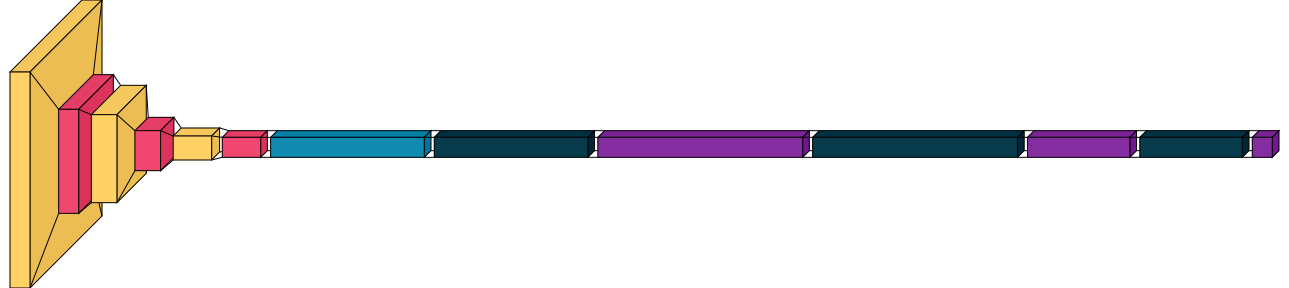

In [13]:
import json
import tensorflow as tf
from tensorflow.keras.models import model_from_json

model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Conv2D(384, (5,5), activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(2048, activation='relu'),
          tf.keras.layers.Dropout(0.25),
          tf.keras.layers.Dense(1024, activation='relu'),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(2, activation='softmax')
])

# Now visualize the model using visualkeras
import visualkeras
visualkeras.layered_view(model)


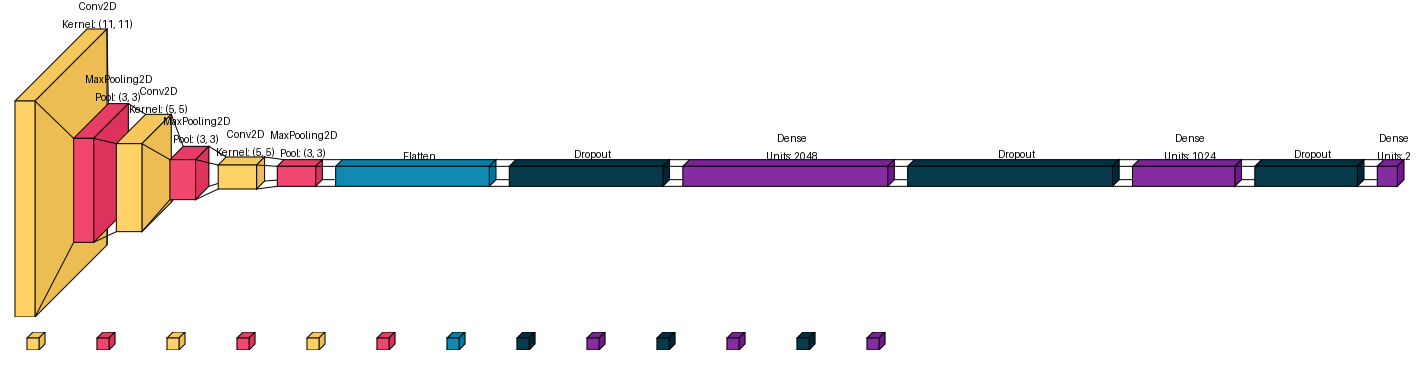

In [18]:
import tensorflow as tf
import visualkeras
from typing import Any, Callable, Tuple

# Define your model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    tf.keras.layers.Conv2D(256, (5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    tf.keras.layers.Conv2D(384, (5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Define a text callable function to customize layer labels
def custom_text_callable(index: int, layer: tf.keras.layers.Layer) -> Tuple[str, bool]:
    if isinstance(layer, tf.keras.layers.Conv2D):
        return (f"{layer.__class__.__name__}\nKernel: {layer.kernel_size}", True)
    elif isinstance(layer, tf.keras.layers.MaxPooling2D):
        return (f"{layer.__class__.__name__}\nPool: {layer.pool_size}", True)
    elif isinstance(layer, tf.keras.layers.Dense):
        return (f"{layer.__class__.__name__}\nUnits: {layer.units}", True)
    else:
        return (layer.__class__.__name__, True)

# Visualize the model using visualkeras with adjusted parameters
visualkeras.layered_view(
    model,
    to_file=None,  # Save to file if desired
    color_map={
        'Conv2D': 'cyan',
        'MaxPooling2D': 'magenta',
        'Flatten': 'yellow',
        'Dropout': 'orange',
        'Dense': 'green'
    },
    text_callable=custom_text_callable,  # Use the custom text callable
    legend=True,
    show_dimension=True,
    spacing=20,         # Increase space between layers
    text_vspacing=8,    # Increase vertical space for text
    padding=15          # Increase padding around layers
)
